IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      35.0 -0.026784   0.009838    2.268397   0.102617         68.0   
1       2.0  0.031830   0.048163    3.238767   0.221449         65.0   
2      52.0 -0.029737   0.007649   -0.665174   0.092275        107.0   
3      22.0 -0.003422   0.011581    2.657857   0.107527         58.0   
4      40.0 -0.025361   0.007232   -0.540148   0.088639         95.0   
...     ...       ...        ...         ...        ...          ...   
1344   50.0 -0.140851   0.039920   -1.481988   0.244252         91.0   
1345    7.0  0.009608   0.007576   -0.459746   0.087447         70.0   
1346    5.0 -0.044457   0.010192    0.374945   0.110180          0.0   
1347    2.0 -0.062510   0.011057    0.731551   0.122202          0.0   
1348   45.0 -0.051763   0.006209   -0.069106   0.094196          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            92.0    5.378339    5.235995 -0.008557  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.026784   0.009838    2.268397   0.102617         68.0         92.0   
1     0.031830   0.048163    3.238767   0.221449         65.0         83.0   
2    -0.029737   0.007649   -0.665174   0.092275        107.0         78.0   
3    -0.003422   0.011581    2.657857   0.107527         58.0         73.0   
4    -0.025361   0.007232   -0.540148   0.088639         95.0         71.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.140851   0.039920   -1.481988   0.244252         91.0         90.0   
1345  0.009608   0.007576   -0.459746   0.087447         70.0         89.0   
1346 -0.044457   0.010192    0.374945   0.110180          0.0         82.0   
1347 -0.062510   0.011057    0.731551   0.122202          0.0        111.0   
1348 -0.051763   0.006209   -0.069106   0.094196          0.0        114.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.044236   0.018199   -0.769808   0.141806         81.0         79.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.566022     3.52808   0.01338   0.003097  ...       6236.388436   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.287694          0.523915          -0.873535          3.366228   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               115.0               112.0          26.703369   

     amp2(Curr(ESC_5))  Guasto  
340           8.216298       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.026784   0.009838    2.268397   0.102617         68.0         92.0   
1     0.031830   0.048163    3.238767   0.221449         65.0         83.0   
2    -0.029737   0.007649   -0.665174   0.092275        107.0         78.0   
3    -0.003422   0.011581    2.657857   0.107527         58.0         73.0   
4    -0.025361   0.007232   -0.540148   0.088639         95.0         71.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.140851   0.039920   -1.481988   0.244252         91.0         90.0   
1345  0.009608   0.007576   -0.459746   0.087447         70.0         89.0   
1346 -0.044457   0.010192    0.374945   0.110180          0.0         82.0   
1347 -0.062510   0.011057    0.731551   0.122202          0.0        111.0   
1348 -0.051763   0.006209   -0.069106   0.094196          0.0        114.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.026784   0.009838    2.268397   0.102617    68.000000    92.000000   
1     0.031830   0.048163    3.238767   0.221449    65.000000    83.000000   
2    -0.029737   0.007649   -0.665174   0.092275   107.000000    78.000000   
3    -0.003422   0.011581    2.657857   0.107527    58.000000    73.000000   
4    -0.025361   0.007232   -0.540148   0.088639    95.000000    71.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.113910   0.040033   -0.465149   0.229997    60.268149    81.194964   
1619 -0.019333   0.006605   -0.415179   0.083432    77.767324   100.844883   
1620 -0.026988   0.007406   -0.577863   0.090087   102.091984    76.545992   
1621 -0.015501   0.006233   -0.335927   0.080349    87.757309    86.121346   
1622  0.001887   0.007237   -0.343653   0.084990     0.000000   115.128243   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000001522E265120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True False  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.307054
28          freq1(AccX)  3.445166
12          freq1(GyrY)  3.071975
11            RMS(GyrY)  2.832723
9             var(GyrY)  2.685046
153    kurt(RPM(ESC_5))  2.651028
93    freq2(RPM(ESC_1))  2.447441
14           amp1(GyrY)  2.442234
92    freq1(RPM(ESC_1))  2.433549
159    var(Curr(ESC_5))  2.243736
104      <>(RPM(ESC_2))  2.034292
8              <>(GyrY)  1.968453
152     var(RPM(ESC_5))  1.846426
107     RMS(RPM(ESC_2))  1.696159
32             <>(AccY)  1.690144
78     amp1(RPM(ESC_0))  1.686115
22           amp1(GyrZ)  1.671321
62          amp1(Pitch)  1.273693
30           amp1(AccX)  1.107711
76    freq1(RPM(ESC_0))  1.035870
80      <>(Curr(ESC_0))  1.017260
4           freq1(GyrX)  1.013407
17            var(GyrZ)  0.983320
77    freq2(RPM(ESC_0))  0.897327
57           var(Pitch)  0.887215
156    amp1(RPM(ESC_5))  0.844561
19            RMS(GyrZ)  0.776194
81     var(Curr(ESC_0))  0.734782
97     var(Cur

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.026784   0.009838    68.000000 -0.008557   0.006183   0.078994   
1     0.031830   0.048163    65.000000 -0.050875   0.040699   0.207779   
2    -0.029737   0.007649   107.000000  0.049702   0.012495   0.122206   
3    -0.003422   0.011581    58.000000  0.065303   0.011287   0.124585   
4    -0.025361   0.007232    95.000000  0.046652   0.012554   0.121235   
...        ...        ...          ...       ...        ...        ...   
1618 -0.113910   0.040033    60.268149  0.046838   0.010474   0.112426   
1619 -0.019333   0.006605    77.767324  0.043879   0.012763   0.121056   
1620 -0.026988   0.007406   102.091984  0.047636   0.012516   0.121465   
1621 -0.015501   0.006233    87.757309  0.042853   0.013046   0.121847   
1622  0.001887   0.007237     0.000000  0.014560   0.005502   0.075501   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
0      111.000000    6.471797    

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.044236   0.018199         81.0   0.01338   0.003097   0.057163   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
340         91.0    3.079352    2.727381   0.006132  ...      5210.887866   

     var(Curr(ESC_2))  freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340          0.595673               42.0               43.0         -0.770259   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340    938163.288857         -0.951001       9714.811351         3.287694   

     var(Curr(ESC_5))  
340          0.523915  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
0    -0.026784   0.009838    68.000000 -0.008557   0.004614   0.111163   
1     0.031830   0.048163    65.000000 -0.050875   0.020602   0.215142   
2    -0.029737   0.007649   107.000000  0.049702   0.008061   0.147539   
3    -0.003422   0.011581    58.000000  0.065303   0.004473   0.111273   
4    -0.025361   0.007232    95.000000  0.046652   0.008168   0.149521   
...        ...        ...          ...       ...        ...        ...   
1618 -0.113910   0.040033    60.268149  0.046838   0.004487   0.130498   
1619 -0.019333   0.006605    77.767324  0.043879   0.008401   0.152010   
1620 -0.026988   0.007406   102.091984  0.047636   0.008124   0.148828   
1621 -0.015501   0.006233    87.757309  0.042853   0.008609   0.153577   
1622  0.001887   0.007237     0.000000  0.014560   0.005668   0.156695   

      amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
0       2.957467          0.552671     

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
340 -0.044236   0.018199         81.0   0.01338   0.006132   0.130247   

     amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
340    0.537671          0.306589     5116.101036          0.595673   

     kurt(RPM(ESC_4))  
340         -0.770259  


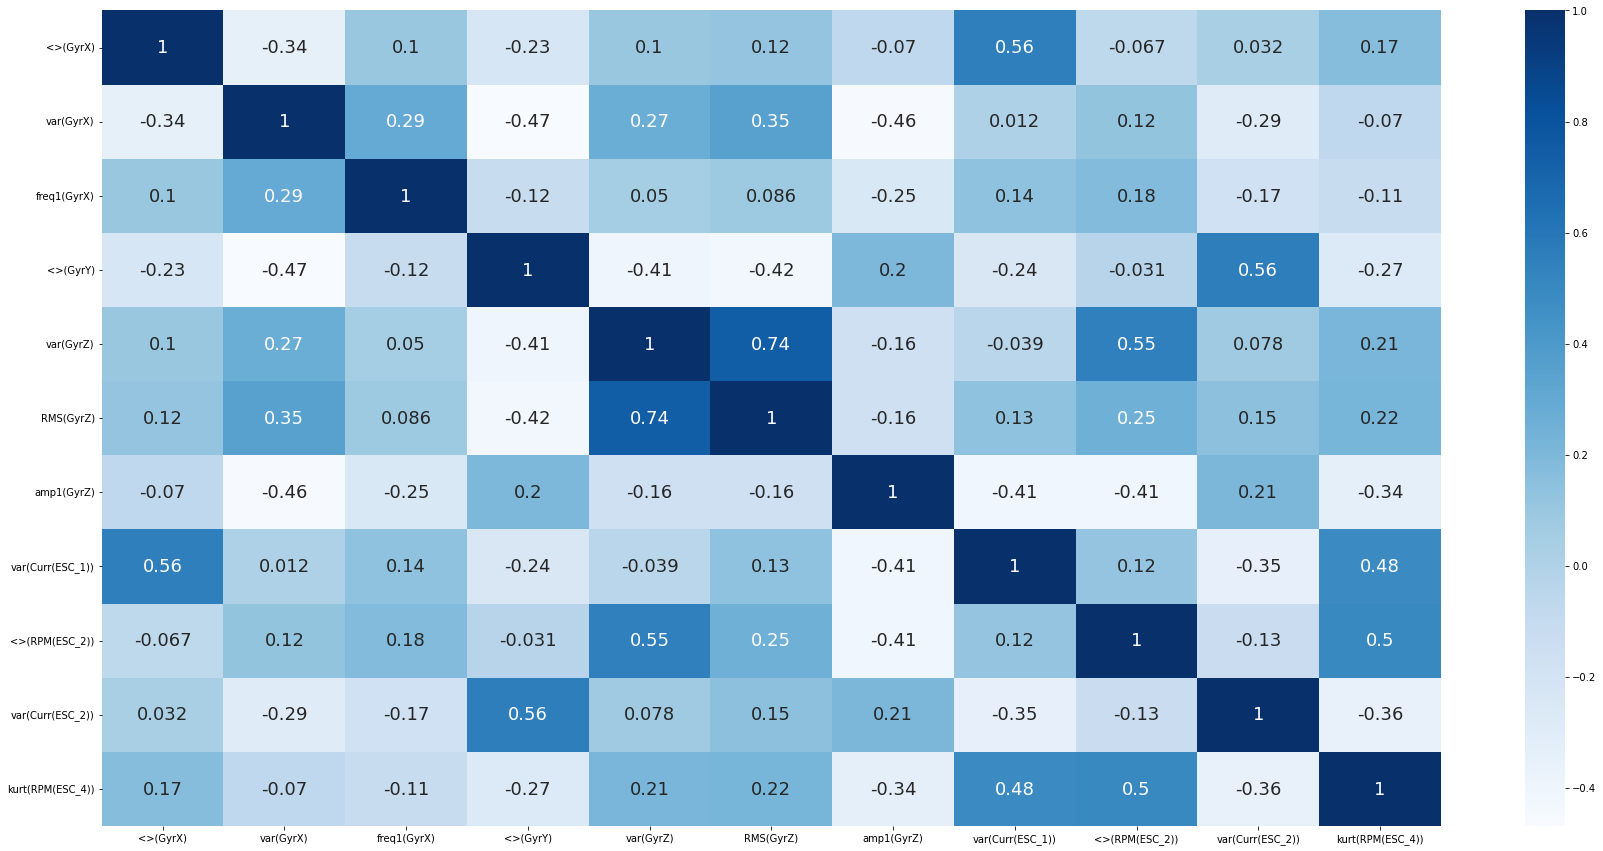

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 11)
(325, 11)
(1298, 1)
(325, 1)


In [24]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.78076923 0.79615385 0.83846154 0.81853282 0.77992278]
Accuracy: 0.78 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64


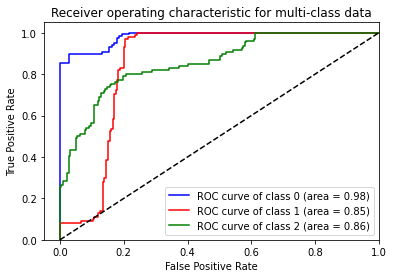

----------------------------------------------------
Cross-Validation: [0.66153846 0.66923077 0.65       0.64478764 0.64092664]
Accuracy: 0.62 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


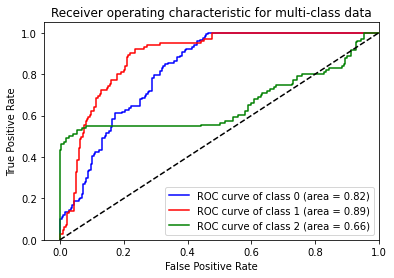

----------------------------------------------------
Cross-Validation: [0.51923077 0.55769231 0.50769231 0.33976834 0.53281853]
Accuracy: 0.46 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


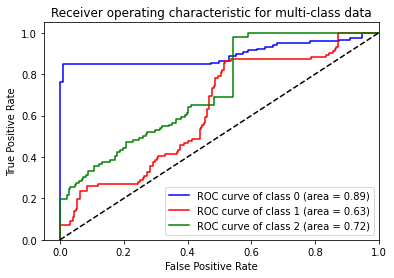

----------------------------------------------------
Cross-Validation: [0.41153846 0.46538462 0.33461538 0.55598456 0.33590734]
Accuracy: 0.31 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


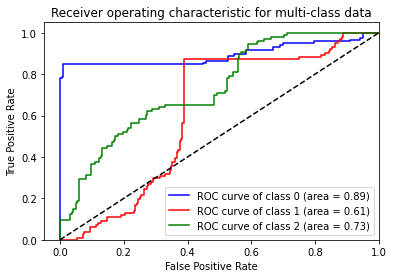

----------------------------------------------------


In [25]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

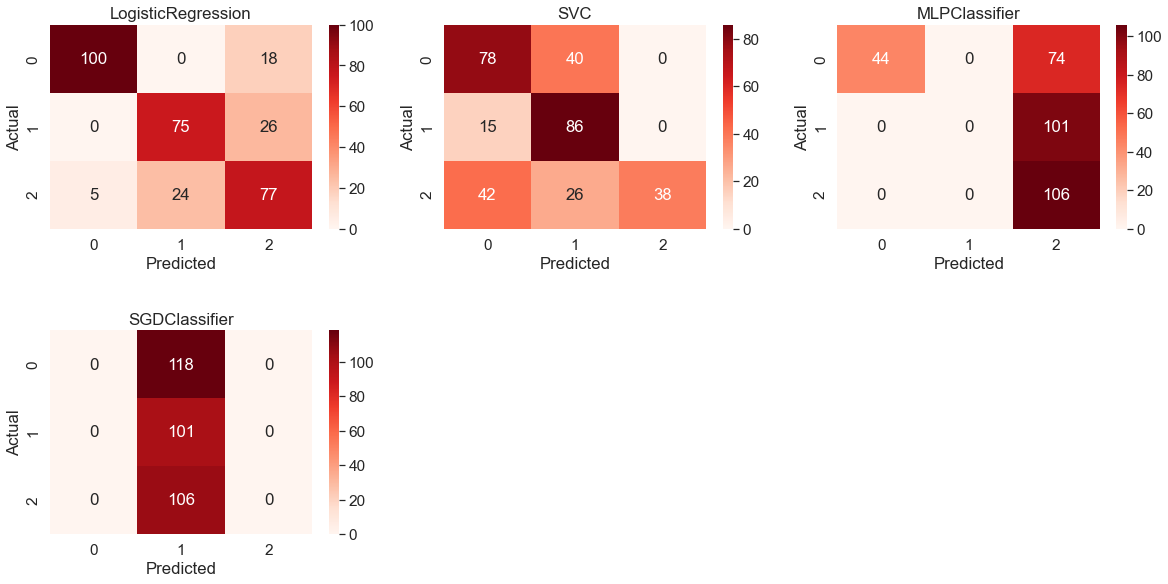

In [26]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

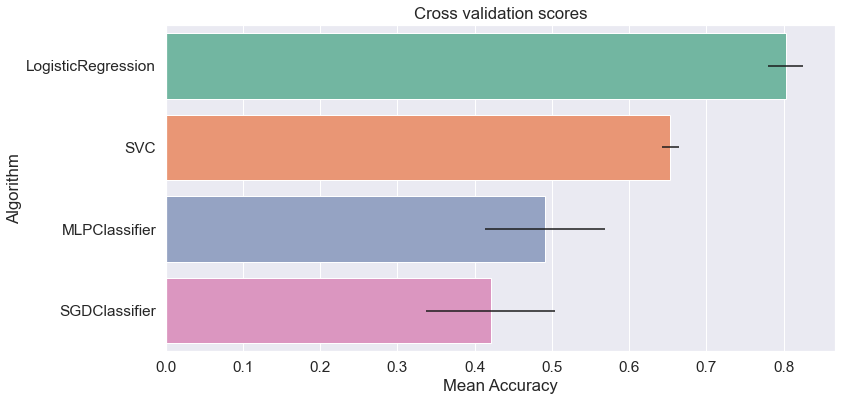

In [27]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [28]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       118
           1       0.76      0.74      0.75       101
           2       0.64      0.73      0.68       106

    accuracy                           0.78       325
   macro avg       0.78      0.77      0.78       325
weighted avg       0.79      0.78      0.78       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       118
           1       0.57      0.85      0.68       101
           2       1.00      0.36      0.53       106

    accuracy                           0.62       325
   macro avg       0.71      0.62      0.61       325
weighted avg       0.71      0.62      0.61       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       118
           1       0.00